# Perform EDA and any data cleaning if necessary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis, boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

Sales_data = pd.read_csv('WholeSales.csv')
Sales_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
Sales_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
Sales_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
Sales_data.shape

(440, 8)

In [5]:
Sales_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
print(Sales_data.isnull().sum())  

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [7]:
Sales_data.Region.unique()

array([3, 1, 2], dtype=int64)

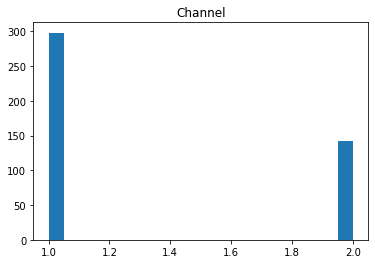

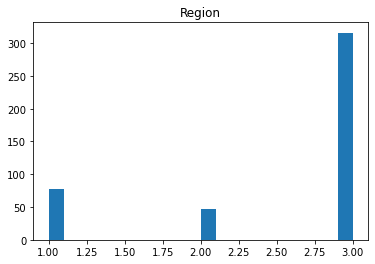

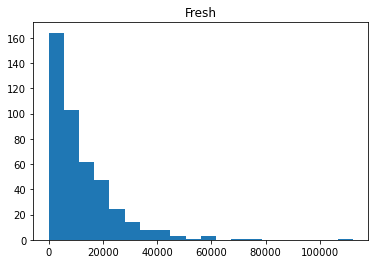

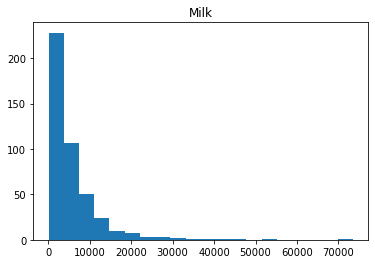

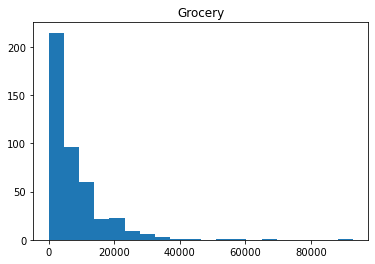

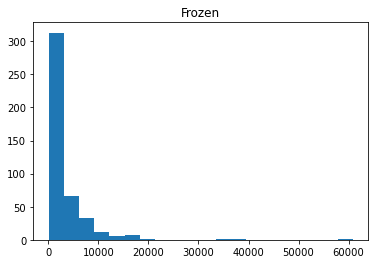

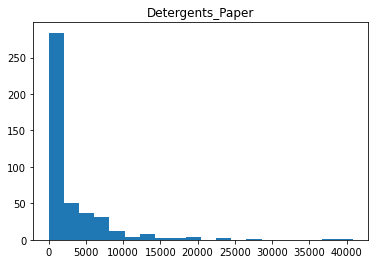

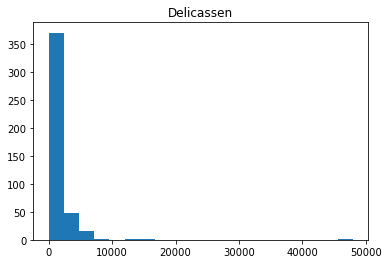

In [8]:
for i, feature in enumerate(Sales_data):
    plt.title(feature)
    plt.hist(Sales_data[feature], bins = 20)
    plt.show()

In [9]:
outlier_indices = []
def outlier_detection(name):
    index_outlier = []
    Q1 = np.percentile(Sales_data[name], 25)
    Q3 = np.percentile(Sales_data[name], 75)
    IQR = Q3 - Q1
    lower_point = Q1 - 1.5 * IQR
    higher_point = Q3 + 1.5 * IQR
    
    for i, point in enumerate(Sales_data[name]):
        if point < lower_point or point > higher_point:
            index_outlier.append(i)

    return index_outlier

for name in list(Sales_data):
    outlier_indices += outlier_detection(name)
    # number of outliers
print(len(outlier_indices)) 
    
   

172


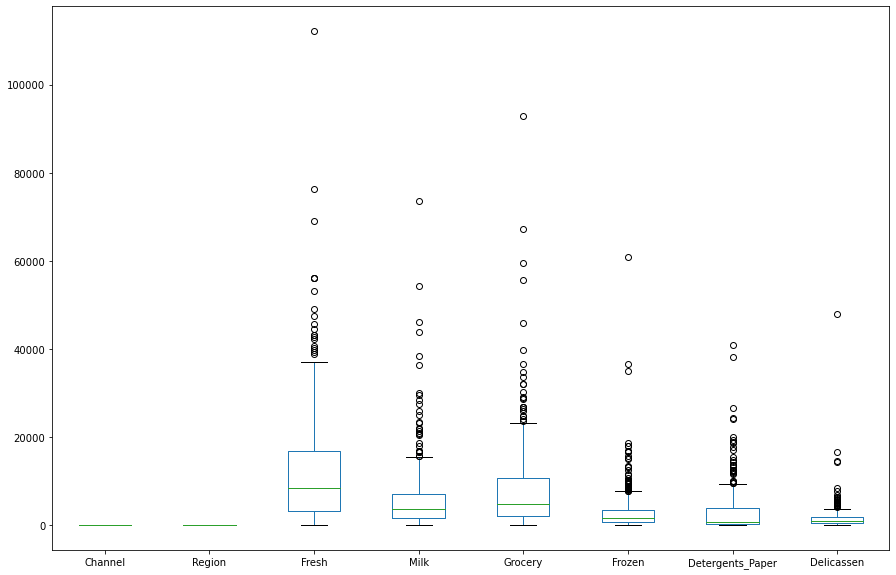

In [10]:
fig = plt.figure(figsize = (15,10))
boxplot = Sales_data.boxplot(column=[i for i in list(Sales_data)], grid = False)

 # Implement feature Scaling 

In [11]:
Sales_data_train = Sales_data.drop(columns = ['Channel'], axis = 1)
channel_label = Sales_data['Channel']
#customer_dataset = boxcox(customer_dataset, 0)
# Checking the tails for each feature
for name in list(Sales_data_train):
    Sales_data_train[name] = boxcox(Sales_data_train[name] , 0)

In [12]:
Sales_data_train

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...
435,1.098612,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,1.098612,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,1.098612,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,1.098612,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


# Normalizing(minmaxscaler) 

In [13]:
Sales_data_nrm=pd.DataFrame(MinMaxScaler().fit_transform(Sales_data_train), columns = Sales_data_train.columns)
Sales_data_nrm.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,0.792887,0.718009,0.757507,0.275354,0.713634,0.630253
1,1.0,0.737313,0.720208,0.780276,0.545723,0.735510,0.659511
2,1.0,0.727332,0.705239,0.759068,0.585620,0.742394,0.812973
3,1.0,0.797253,0.427833,0.701127,0.711219,0.538941,0.660206
4,1.0,0.847922,0.637521,0.752748,0.648109,0.670702,0.770203


# Standardize(StandardScaler)

In [14]:
Sales_data_std=pd.DataFrame(StandardScaler().fit_transform(Sales_data_train), columns = Sales_data_train.columns)
Sales_data_std.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.565896,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.565896,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.565896,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.565896,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.565896,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


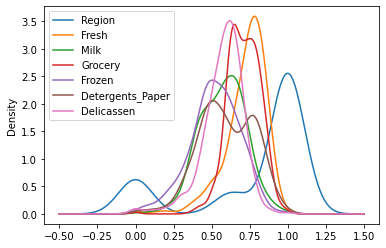

In [15]:
pd.DataFrame(Sales_data_nrm).plot(kind='kde');

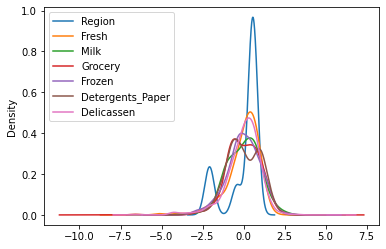

In [16]:
pd.DataFrame(Sales_data_std).plot(kind='kde');

# implement RFECV

In [17]:
channel_label

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
selector = RFECV(svc, step=1, cv=5)
selector = selector.fit(Sales_data_nrm, channel_label)

In [19]:
print(Sales_data.columns)
print(selector.ranking_)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
[3 2 1 1 1 1 4]


In [20]:
selector.grid_scores_

array([0.90454545, 0.90454545, 0.92045455, 0.92272727, 0.88181818,
       0.87045455, 0.87272727])

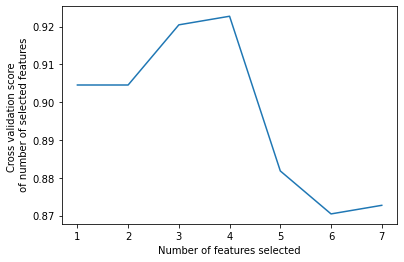

In [21]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Implement K-Means Clustering

In [22]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Sales_data_nrm)
    Sum_of_squared_distances.append(km.inertia_)

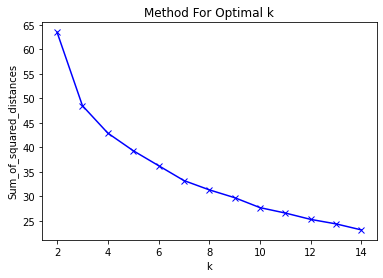

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Method For Optimal k')
plt.show()

# Implement PCA

In [24]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(Sales_data_nrm)
pca.n_components_

6

([<matplotlib.axis.XTick at 0x25108b37b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

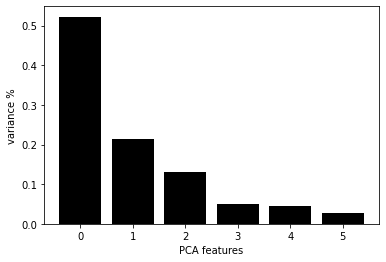

In [25]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

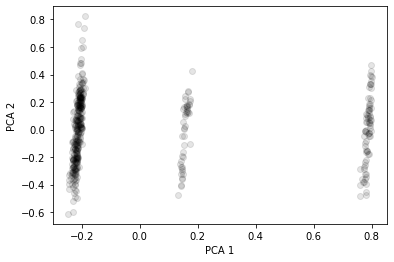

In [26]:
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [27]:
channel_label[channel_label == 2] = 0
channel_label[channel_label == 1] = 1

# Implement Xgboost

In [28]:
X = Sales_data.drop('Channel', axis=1)

y = Sales_data['Channel']

In [29]:
X.head()


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [30]:
import xgboost as xgb
from xgboost import cv

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
from xgboost import XGBClassifier

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)


[07:58:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [36]:
y_pred = xgb_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8864


In [38]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [39]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.904273,0.015496,0.873013,0.006479
1,0.930850,0.025042,0.901821,0.033469
2,0.933181,0.025821,0.912881,0.027724
3,0.945328,0.018717,0.922067,0.035945
4,0.958324,0.005055,0.941464,0.024283


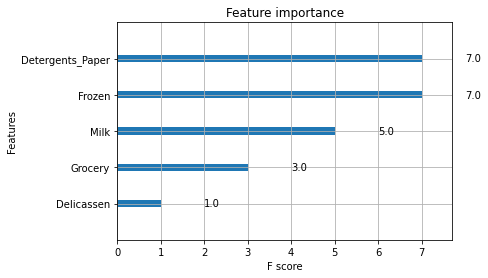

<Figure size 1152x864 with 0 Axes>

In [40]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()